## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

%matplotlib inline

## Loading the Data

In [2]:
# reading the train and test datasets
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
# increasing the number of displays
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 500)

In [4]:
# verifying the train dataset
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# verifying the train dataset
train.shape

(2051, 81)

In [6]:
# verifying the test dataset
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [7]:
# verifying the test dataset
test.shape

(879, 80)

In [8]:
# setting index as 'Id'
train.set_index('Id').head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data Cleaning: Initial Check (Train)

In [9]:
# check for nulls
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = True)

Total Bsmt SF        1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        22
Mas Vnr Type        22
BsmtFin Type 1      55
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 2      56
Bsmt Exposure       58
Garage Type        113
Garage Finish      114
Garage Qual        114
Garage Cond        114
Garage Yr Blt      114
Lot Frontage       330
Fireplace Qu      1000
Fence             1651
Alley             1911
Misc Feature      1986
Pool QC           2042
dtype: int64

In [10]:
# list of features with few null values 
small_no_of_nulls = [k for k in train.columns[(train.isnull().sum() > 0) & (train.isnull().sum() <= 22) ]]

In [11]:
# list of features with many null values
large_no_of_nulls = [k for k in train.columns[(train.isnull().sum() > 0) & (train.isnull().sum() >= 55) ]]

In [12]:
# check column data types
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [13]:
# looking through the object datatypes
train.dtypes[train.dtypes == 'object']

MS Zoning         object
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object


In [14]:
# dropping Id and PID as they're as good as index
train = train.drop(columns=['Id', 'PID'])

## Data Cleaning: Dropping NaN 

In [15]:
# droping rows for those with small % of NaN in columns
train = train.dropna(subset=small_no_of_nulls)

In [16]:
train.shape

(2026, 79)

## Data Cleaning: Finding and Dropping Continuous Features with High Collinearity

In [17]:
# list of continuous variables
features_cont = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
                '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
                'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']

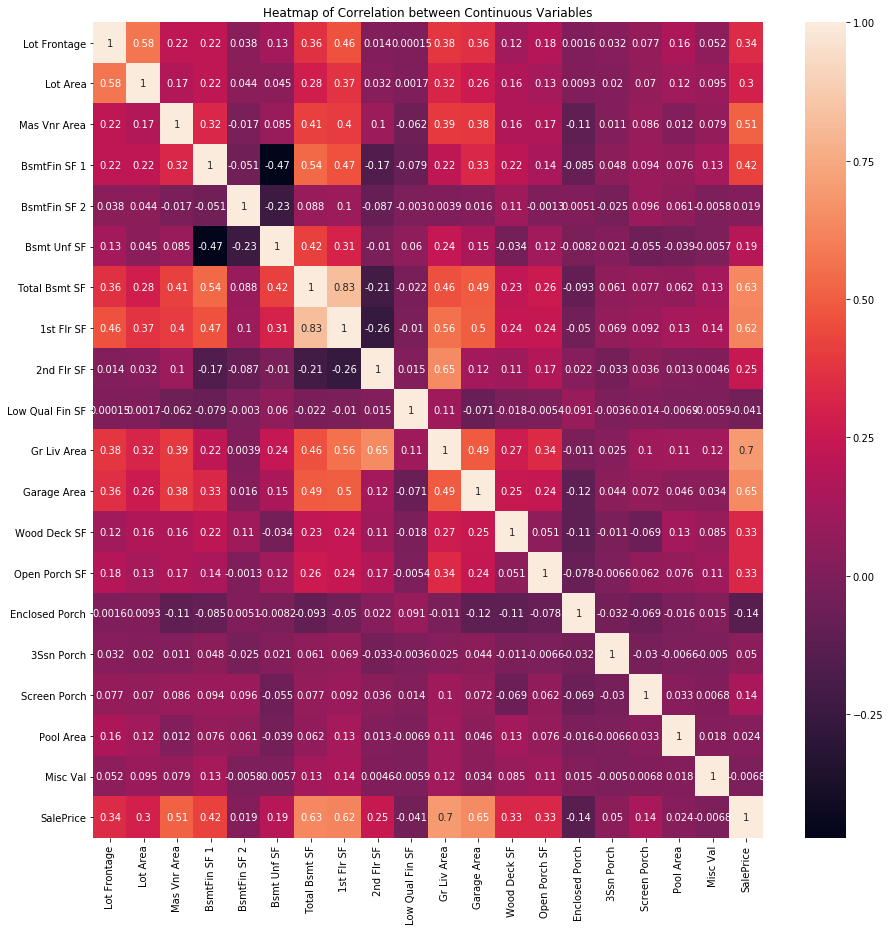

In [18]:
plt.figure(figsize=(15,15))
ax = plt.axes()
ax.set_title(label='Heatmap of Correlation between Continuous Variables')
sns.heatmap(train[features_cont].corr(), annot=True)

From the heatmap, we see that 'Total Bsmt SF' vs '1st Flr SF' has a correlation of 0.83 and '2nd Flr SF' vs 'Gr Liv Area' has a correlation of 0.65. This suggests collinearity between 'Total Bsmt SF' vs '1st Flr SF' and '2nd Flr SF' vs 'Gr Liv Area'. We will drop the features in the pair with lower correlation vs 'SalePrice'. 'Total Bsmt SF' (0.63) vs '1st Flr SF' (0.62) and '2nd Flr SF' (0.25) vs 'Gr Liv Area'(0.7). We will drop '1st Flr SF' and 'Gr Liv Area'.

In [19]:
train = train.drop(columns=['1st Flr SF', 'Gr Liv Area'])

## Data Cleaning: Filling NaN 

In [20]:
# we will explore ways to fill these columns 
large_no_of_nulls

['Lot Frontage',
 'Alley',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [21]:
# filling NaN with average Lot Frontage 
train['Lot Frontage'] = train['Lot Frontage'].fillna(np.mean(train['Lot Frontage']))

In [22]:
# verifying the fill
train['Lot Frontage'].isnull().value_counts()

False    2026
Name: Lot Frontage, dtype: int64

In [23]:
# the NaN values in 'Alley' actually indicate the absence of an alley, we will fill NaN with 'No Alley'
train['Alley'] = train['Alley'].fillna('No Alley')

In [24]:
# verifying the fill
train['Alley'].value_counts()

No Alley    1888
Grvl          85
Pave          53
Name: Alley, dtype: int64

In [25]:
# the NaN values in 'Bsmt Qual' actually indicate the absence of a basement, we will fill NaN with 'No Basement'
train['Bsmt Qual'] = train['Bsmt Qual'].fillna('No Basement')

In [26]:
# verifying the fill
train['Bsmt Qual'].value_counts()

TA             886
Gd             849
Ex             177
Fa              60
No Basement     53
Po               1
Name: Bsmt Qual, dtype: int64

In [27]:
# since 'Bsmt Qual' is an ordinal feature, we will map each grade from with a value from 0 to 5.
# 0 being the worst(No Basement) and 5 being the best (Ex)
train['Bsmt Qual'] = train['Bsmt Qual'].map({'No Basement' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 })

In [28]:
# verifying the change
train['Bsmt Qual'].value_counts()

3    886
4    849
5    177
2     60
0     53
1      1
Name: Bsmt Qual, dtype: int64

In [29]:
# the NaN values in 'Bsmt Cond' actually indicate the absence of a basement, we will fill NaN with 'No Basement'
train['Bsmt Cond'] = train['Bsmt Cond'].fillna('No Basement')

In [30]:
# verifying the fill
train['Bsmt Cond'].value_counts()

TA             1813
Gd               87
Fa               65
No Basement      53
Po                5
Ex                3
Name: Bsmt Cond, dtype: int64

In [31]:
# since 'Bsmt Cond' is an ordinal feature, we will map each grade from with a value from 0 to 5.
# 0 being the worst(No Basement) and 5 being the best (Ex)
train['Bsmt Cond'] = train['Bsmt Cond'].map({'No Basement' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 })

In [32]:
# verifying the change
train['Bsmt Cond'].value_counts()

3    1813
4      87
2      65
0      53
1       5
5       3
Name: Bsmt Cond, dtype: int64

In [33]:
# the NaN values in 'Bsmt Exposure' actually indicate the absence of a basement, we will fill NaN with 'No Basement'
train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('No Basement')

In [34]:
# verifying the fill
train['Bsmt Exposure'].value_counts()

No             1321
Av              284
Gd              202
Mn              163
No Basement      56
Name: Bsmt Exposure, dtype: int64

In [35]:
# since 'Bsmt Exposure' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(No Basement) and 4 being the best (Gd)
train['Bsmt Exposure'] = train['Bsmt Exposure'].map({'No Basement' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4})

In [36]:
# verifying the change
train['Bsmt Exposure'].value_counts()

1    1321
3     284
4     202
2     163
0      56
Name: Bsmt Exposure, dtype: int64

In [37]:
# the NaN values in 'BsmtFin Type 1' actually indicate the absence of a basement, we will fill NaN with 'No Basement'
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('No Basement')

In [38]:
# verifying the fill
train['BsmtFin Type 1'].value_counts()

GLQ            604
Unf            593
ALQ            292
BLQ            200
Rec            182
LwQ            102
No Basement     53
Name: BsmtFin Type 1, dtype: int64

In [39]:
# since 'BsmtFin Type 1' is an ordinal feature, we will map each grade from with a value from 0 to 6.
# 0 being the worst(No Basement) and 6 being the best (GLQ)
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map({'No Basement' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6})

In [40]:
# verifying the change
train['BsmtFin Type 1'].value_counts()

6    604
1    593
5    292
4    200
3    182
2    102
0     53
Name: BsmtFin Type 1, dtype: int64

In [41]:
# the NaN values in 'BsmtFin Type 2' actually indicate the absence of a basement, we will fill NaN with 'No Basement'
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('No Basement')

In [42]:
# verifying the fill
train['BsmtFin Type 2'].value_counts()

Unf            1727
Rec              80
LwQ              60
No Basement      54
BLQ              48
ALQ              34
GLQ              23
Name: BsmtFin Type 2, dtype: int64

In [43]:
# since 'BsmtFin Type 2' is an ordinal feature, we will map each grade from with a value from 0 to 6.
# 0 being the worst(No Basement) and 6 being the best (GLQ)
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map({'No Basement' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6})

In [44]:
# verifying the change
train['BsmtFin Type 2'].value_counts()

1    1727
3      80
2      60
0      54
4      48
5      34
6      23
Name: BsmtFin Type 2, dtype: int64

In [45]:
# the NaN values in 'Fireplace Qu' indicate that the house has no fireplace, we will fill NaN with 'No Fireplace'
train['Fireplace Qu'] = train['Fireplace Qu'].fillna('No Fireplace')

In [46]:
# verifying the fill
train['Fireplace Qu'].value_counts()

No Fireplace    990
Gd              513
TA              402
Fa               59
Po               31
Ex               31
Name: Fireplace Qu, dtype: int64

In [47]:
# since 'Fireplace Qu' is an ordinal feature, we will map each grade from with a value from 0 to 5.
# 0 being the worst(No Fireplace) and 5 being the best (Ex)
train['Fireplace Qu'] = train['Fireplace Qu'].map({'No Fireplace' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 })

In [48]:
# verifying the change
train['Fireplace Qu'].value_counts()

0    990
4    513
3    402
2     59
5     31
1     31
Name: Fireplace Qu, dtype: int64

In [49]:
# the NaN values in 'Garage Type' indicate that the house has no garage, we will fill NaN with 'No Garage'
train['Garage Type'] = train['Garage Type'].fillna('No Garage')

In [50]:
# verifying the fill
train['Garage Type'].value_counts()

Attchd       1194
Detchd        534
BuiltIn       129
No Garage     112
Basment        27
2Types         19
CarPort        11
Name: Garage Type, dtype: int64

In [51]:
# the NaN values in 'Garage Yr Blt' indicate that the house has no garage, we will fill NaN with 'No Garage'
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna('No Garage')

In [52]:
# verifying the fill
train['Garage Yr Blt'].value_counts()

No Garage    112
2005.0       104
2007.0        77
2006.0        77
2004.0        72
2003.0        64
1977.0        46
1998.0        45
2008.0        43
2000.0        41
1999.0        39
2002.0        35
1976.0        35
1993.0        34
1978.0        33
1950.0        32
1958.0        32
1968.0        32
1996.0        31
1956.0        31
1966.0        29
2001.0        27
1965.0        27
1967.0        26
1997.0        26
1995.0        26
1954.0        25
1994.0        25
1964.0        25
1962.0        25
1979.0        25
1975.0        24
1963.0        22
1992.0        22
1980.0        22
1959.0        22
1960.0        21
1920.0        21
1990.0        21
1940.0        20
1930.0        20
1957.0        20
1961.0        20
1973.0        20
1970.0        20
1953.0        19
1974.0        19
1969.0        18
1971.0        18
1972.0        17
2009.0        17
1939.0        16
1987.0        16
1955.0        15
1948.0        14
1988.0        14
1951.0        12
1989.0        12
1985.0        

In [53]:
# classifying 'Garage Yr Blt' into before 2000 as 'Old', after 2000 as 'New' and 'No Garage' as 'Garage Age'
train['Garage Age'] = train['Garage Yr Blt'].apply(lambda age: 'No Garage' if age == 'No Garage' else ('New' if age - 2000 >= 0 else 'Old'))

In [54]:
# verifying 'Garage Age'
train['Garage Age'].value_counts()

Old          1355
New           559
No Garage     112
Name: Garage Age, dtype: int64

In [55]:
# dropping 'Garage Yr Blt'
train = train.drop(columns='Garage Yr Blt')

In [56]:
# the NaN values in 'Garage Finish' indicate that the house has no garage, we will fill NaN with 'No Garage'
train['Garage Finish'] = train['Garage Finish'].fillna('No Garage')

In [57]:
# verifying the fill
train['Garage Finish'].value_counts()

Unf          845
RFn          572
Fin          497
No Garage    112
Name: Garage Finish, dtype: int64

In [58]:
# since 'Garage Finish' is an ordinal feature, we will map each grade from with a value from 0 to 3.
# 0 being the worst(No Garage) and 3 being the best (Fin)
train['Garage Finish'] = train['Garage Finish'].map({'No Garage' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3})

In [59]:
# verifying the change
train['Garage Finish'].value_counts()

1    845
2    572
3    497
0    112
Name: Garage Finish, dtype: int64

In [60]:
# the NaN values in 'Garage Qual' indicate that the house has no garage, we will fill NaN with 'No Garage'
train['Garage Qual'] = train['Garage Qual'].fillna('No Garage')

In [61]:
# verifying the fill
train['Garage Qual'].value_counts()

TA           1809
No Garage     112
Fa             82
Gd             18
Ex              3
Po              2
Name: Garage Qual, dtype: int64

In [62]:
# since 'Garage Qual' is an ordinal feature, we will map each grade from with a value from 0 to 5.
# 0 being the worst(No Garage) and 5 being the best (Ex)
train['Garage Qual'] = train['Garage Qual'].map({'No Garage' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 })

In [63]:
# verifying the change
train['Garage Qual'].value_counts()

3    1809
0     112
2      82
4      18
5       3
1       2
Name: Garage Qual, dtype: int64

In [64]:
# the NaN values in 'Garage Cond' indicate that the house has no garage, we will fill NaN with 'No Garage'
train['Garage Cond'] = train['Garage Cond'].fillna('No Garage')

In [65]:
# verifying the fill
train['Garage Cond'].value_counts()

TA           1845
No Garage     112
Fa             47
Gd             12
Po              8
Ex              2
Name: Garage Cond, dtype: int64

In [66]:
# since 'Garage Cond' is an ordinal feature, we will map each grade from with a value from 0 to 5.
# 0 being the worst(No Garage) and 5 being the best (Ex)
train['Garage Cond'] = train['Garage Cond'].map({'No Garage' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 })

In [67]:
# verifying the change
train['Garage Cond'].value_counts()

3    1845
0     112
2      47
4      12
1       8
5       2
Name: Garage Cond, dtype: int64

In [68]:
# there are too many NaN values for 'Pool QC'even in presence of a pool, we will thus drop this column
train = train.drop(columns='Pool QC')

In [69]:
# the NaN values in 'Fence' indicate that the house has no fence, we will fill NaN with 'No Fence'
train['Fence'] = train['Fence'].fillna('No Fence')

In [70]:
# verifying the fill
train['Fence'].value_counts()

No Fence    1628
MnPrv        225
GdPrv         83
GdWo          80
MnWw          10
Name: Fence, dtype: int64

In [71]:
# since 'Fence' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(No Fence) and 4 being the best (GdPrv)
train['Fence'] = train['Fence'].map({'No Fence' : 0, 'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4})

In [72]:
# verifying the change
train['Fence'].value_counts()

0    1628
3     225
4      83
2      80
1      10
Name: Fence, dtype: int64

In [73]:
# the NaN values in 'Misc Feature' indicate that the house has no misc feature, we will fill NaN with 'None'
train['Misc Feature'] = train['Misc Feature'].fillna('None')

In [74]:
# verifying the fill
train['Misc Feature'].value_counts()

None    1961
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: Misc Feature, dtype: int64

In [75]:
# checking for nulls after cleaning 
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = True)

Series([], dtype: int64)

## Data Cleaning: Correcting Data Types

In [76]:
# checking all the datatypes after cleaning
train.dtypes

MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1       int64
BsmtFin SF 1       float64
BsmtFin Type 2       int64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
T

In [77]:
# looking through the object datatypes after filling NaN
train.dtypes[train.dtypes == 'object']

MS Zoning       object
Street          object
Alley           object
Lot Shape       object
Land Contour    object
Utilities       object
Lot Config      object
Land Slope      object
Neighborhood    object
Condition 1     object
Condition 2     object
Bldg Type       object
House Style     object
Roof Style      object
Roof Matl       object
Exterior 1st    object
Exterior 2nd    object
Mas Vnr Type    object
Exter Qual      object
Exter Cond      object
Foundation      object
Heating         object
Heating QC      object
Central Air     object
Electrical      object
Kitchen Qual    object
Functional      object
Garage Type     object
Paved Drive     object
Misc Feature    object
Sale Type       object
Garage Age      object
dtype: object

In [78]:
# MS SubClass should be nominal
train['MS SubClass'] = train['MS SubClass'].map({20 : '1-STORY 1946 & NEWER ALL STYLES', 30 : '1-STORY 1945 & OLDER',
                                                40 : '1-STORY W/FINISHED ATTIC ALL AGES', 45 : '1-1/2 STORY - UNFINISHED ALL AGES',
                                                50 : '1-1/2 STORY FINISHED ALL AGES', 60 : '2-STORY 1946 & NEWER',
                                                70 : '2-STORY 1945 & OLDER', 75 : '2-1/2 STORY ALL AGES',
                                                80 : 'SPLIT OR MULTI-LEVEL', 85 : 'SPLIT FOYER',
                                                90 : 'DUPLEX - ALL STYLES AND AGES', 120 : '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                                150 : '1-1/2 STORY PUD - ALL AGES', 160 : '2-STORY PUD - 1946 & NEWER',
                                                180 : 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 190 : '2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [79]:
# verifying the change
train['MS SubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          758
2-STORY 1946 & NEWER                                     385
1-1/2 STORY FINISHED ALL AGES                            198
1-STORY PUD (Planned Unit Development) - 1946 & NEWER    130
1-STORY 1945 & OLDER                                     101
2-STORY 1945 & OLDER                                      89
2-STORY PUD - 1946 & NEWER                                88
SPLIT OR MULTI-LEVEL                                      85
DUPLEX - ALL STYLES AND AGES                              75
2 FAMILY CONVERSION - ALL STYLES AND AGES                 46
SPLIT FOYER                                               28
2-1/2 STORY ALL AGES                                      16
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   11
1-1/2 STORY - UNFINISHED ALL AGES                         11
1-STORY W/FINISHED ATTIC ALL AGES                          4
1-1/2 STORY PUD - ALL AGES                                 1
Name: MS SubClass, dtype

In [80]:
# since 'Lot Shape' is an ordinal feature, we will map each grade from with a value from 0 to 3.
# 0 being the worst(Irregular) and 4 being the best (Regular)
train['Lot Shape'] = train['Lot Shape'].map({'IR3' : 0, 'IR2' : 1, 'IR1' : 2, 'Reg' : 3})

In [81]:
# verifying the change
train['Lot Shape'].value_counts()

3    1283
2     680
1      54
0       9
Name: Lot Shape, dtype: int64

In [82]:
# since 'Utilities' is an ordinal feature, we will map each grade from with a value from 0 to 3.
# 0 being the worst(ELO) and 4 being the best (AllPub)
train['Utilities'] = train['Utilities'].map({'ELO' : 0, 'NoSeWa' : 1, 'NoSewr' : 2, 'AllPub' : 3})

In [83]:
# verifying the change
train['Utilities'].value_counts()

3    2024
2       1
1       1
Name: Utilities, dtype: int64

In [84]:
# since 'Land Slope' is an ordinal feature, we will map each grade from with a value from 0 to 2.
# 0 being the worst(Sev) and 2 being the best (Gtl)
train['Land Slope'] = train['Land Slope'].map({'Sev' : 0, 'Mod' : 1, 'Gtl' : 2})

In [85]:
# verifying the change
train['Land Slope'].value_counts()

2    1928
1      88
0      10
Name: Land Slope, dtype: int64

In [86]:
# since 'Exter Qual' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(Po) and 4 being the best (Ex)
train['Exter Qual'] = train['Exter Qual'].map({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

In [87]:
# verifying the change
train['Exter Qual'].value_counts()

2    1243
3     677
4      80
1      26
Name: Exter Qual, dtype: int64

In [88]:
# since 'Exter Cond' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(Po) and 4 being the best (Ex)
train['Exter Cond'] = train['Exter Cond'].map({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

In [89]:
# verifying the change
train['Exter Cond'].value_counts()

2    1753
3     215
1      49
4       7
0       2
Name: Exter Cond, dtype: int64

In [90]:
# since 'Heating QC' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(Po) and 4 being the best (Ex)
train['Heating QC'] = train['Heating QC'].map({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

In [91]:
# verifying the change
train['Heating QC'].value_counts()

4    1043
2     594
3     319
1      67
0       3
Name: Heating QC, dtype: int64

In [92]:
# since 'Electrical' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(Mix) and 4 being the best (SBrkr)
train['Electrical'] = train['Electrical'].map({'Mix' : 0, 'FuseP' : 1, 'FuseF' : 2, 'FuseA' : 3, 'SBrkr' : 4})

In [93]:
# verifying the change
train['Electrical'].value_counts()

4    1844
3     139
2      35
1       7
0       1
Name: Electrical, dtype: int64

In [94]:
# since 'Kitchen Qual' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(Po) and 4 being the best (Ex)
train['Kitchen Qual'] = train['Kitchen Qual'].map({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

In [95]:
# verifying the change
train['Kitchen Qual'].value_counts()

2    1044
3     789
4     146
1      47
Name: Kitchen Qual, dtype: int64

In [96]:
# since 'Functional' is an ordinal feature, we will map each grade from with a value from 0 to 7.
# 0 being the worst (Sal) and 7 being the best (Typ)
train['Functional'] = train['Functional'].map({'Sal' : 0, 'Sev' : 1, 'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4, 'Min2' : 5, 'Min1' : 6, 'Typ' : 7})

In [97]:
# verifying the change
train['Functional'].value_counts()

7    1891
6      42
5      42
4      29
3      11
2       7
1       2
0       2
Name: Functional, dtype: int64

In [98]:
# since 'Paved Drive' is an ordinal feature, we will map each grade from with a value from 0 to 2.
# 0 being the worst (N) and 2 being the best (Y)
train['Paved Drive'] = train['Paved Drive'].map({'N' : 0, 'P' : 1, 'Y' : 2, })

In [99]:
# verifying the change
train['Paved Drive'].value_counts()

2    1837
0     150
1      39
Name: Paved Drive, dtype: int64

In [100]:
# since 'Central Air' only has 'Y' or 'N', I will map it to 1 and 0 instead of creating dummies
train['Central Air'] = train['Central Air'].map({'Y' : 1, 'N' : 0})

In [101]:
# looking through the object datatypes after filling NaN and changing ordinal types
train.dtypes[train.dtypes == 'object']

MS SubClass     object
MS Zoning       object
Street          object
Alley           object
Land Contour    object
Lot Config      object
Neighborhood    object
Condition 1     object
Condition 2     object
Bldg Type       object
House Style     object
Roof Style      object
Roof Matl       object
Exterior 1st    object
Exterior 2nd    object
Mas Vnr Type    object
Foundation      object
Heating         object
Garage Type     object
Misc Feature    object
Sale Type       object
Garage Age      object
dtype: object

## Feature Selection: Categorical (Train)

In [102]:
train.dtypes[train.dtypes == 'object'].keys()

Index(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour',
       'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Garage Type',
       'Misc Feature', 'Sale Type', 'Garage Age'],
      dtype='object')

We will be looking at spread of the data to include them in the base model. We will drop columns where most of the value are concentrated around 1-2 unique values of each feature. 

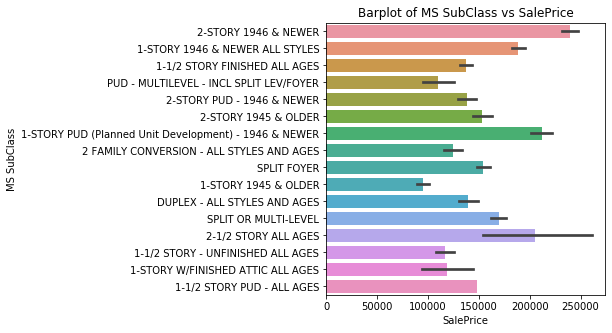

In [103]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of MS SubClass vs SalePrice')
sns.barplot(y = 'MS SubClass', x = 'SalePrice', data = train)

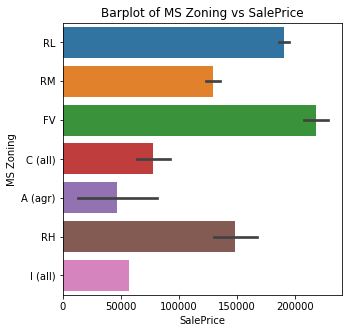

In [104]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of MS Zoning vs SalePrice')
sns.barplot(y = 'MS Zoning', x = 'SalePrice', data = train)

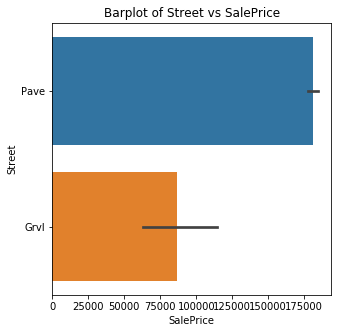

In [105]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Street vs SalePrice')
sns.barplot(y = 'Street', x = 'SalePrice', data = train)

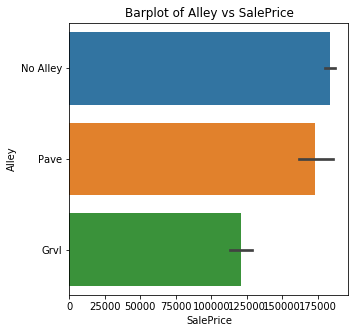

In [106]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Alley vs SalePrice')
sns.barplot(y = 'Alley', x = 'SalePrice', data = train)

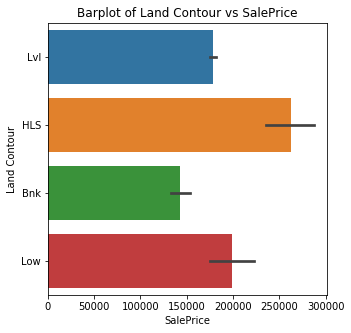

In [107]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Land Contour vs SalePrice')
sns.barplot(y = 'Land Contour', x = 'SalePrice', data = train)

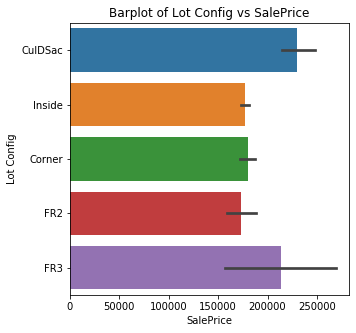

In [108]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Lot Config vs SalePrice')
sns.barplot(y = 'Lot Config', x = 'SalePrice', data = train)

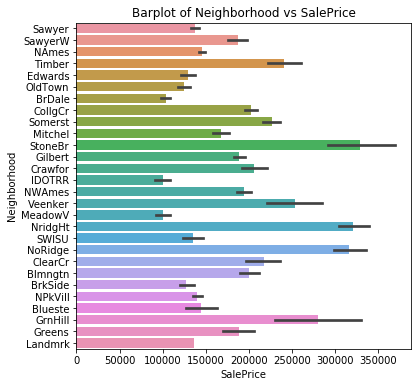

In [109]:
plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_title(label='Barplot of Neighborhood vs SalePrice')
sns.barplot(y = 'Neighborhood', x = 'SalePrice', data = train)

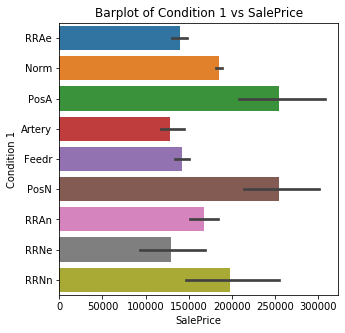

In [110]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Condition 1 vs SalePrice')
sns.barplot(y = 'Condition 1', x = 'SalePrice', data = train)

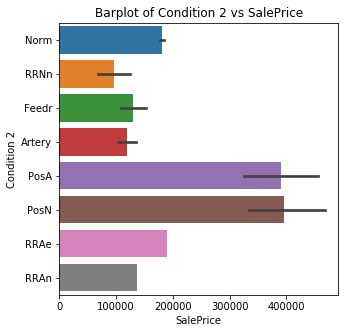

In [111]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Condition 2 vs SalePrice')
sns.barplot(y = 'Condition 2', x = 'SalePrice', data = train)

We will drop 'Condition 2' as most of the values are concentrated around PosA and PosN. 

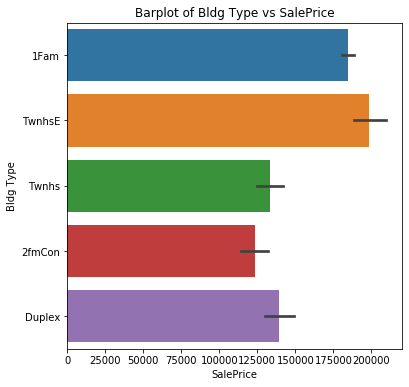

In [112]:
plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_title(label='Barplot of Bldg Type vs SalePrice')
sns.barplot(y = 'Bldg Type', x = 'SalePrice', data = train)

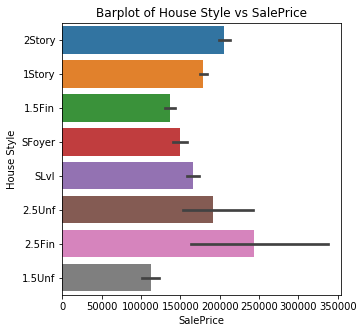

In [113]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of House Style vs SalePrice')
sns.barplot(y = 'House Style', x = 'SalePrice', data = train)

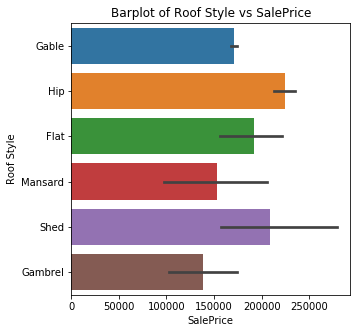

In [114]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Roof Style vs SalePrice')
sns.barplot(y = 'Roof Style', x = 'SalePrice', data = train)

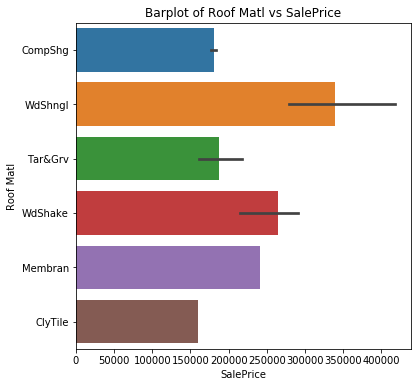

In [115]:
plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_title(label='Barplot of Roof Matl vs SalePrice')
sns.barplot(y = 'Roof Matl', x = 'SalePrice', data = train)

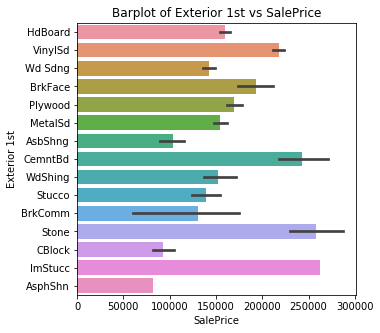

In [116]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Exterior 1st vs SalePrice')
sns.barplot(y = 'Exterior 1st', x = 'SalePrice', data = train)

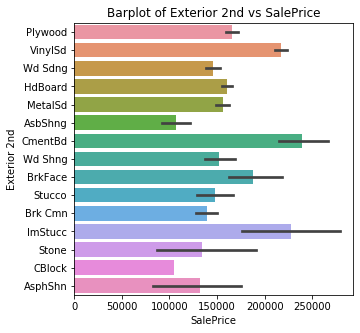

In [117]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Exterior 2nd vs SalePrice')
sns.barplot(y = 'Exterior 2nd', x = 'SalePrice', data = train)

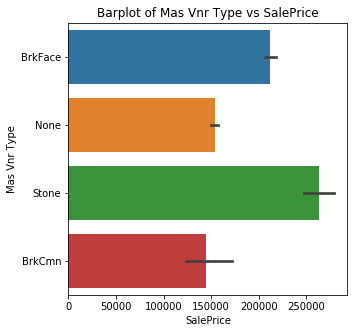

In [118]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Mas Vnr Type vs SalePrice')
sns.barplot(y = 'Mas Vnr Type', x = 'SalePrice', data = train)

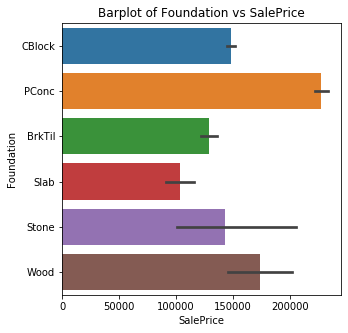

In [119]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Foundation vs SalePrice')
sns.barplot(y = 'Foundation', x = 'SalePrice', data = train)

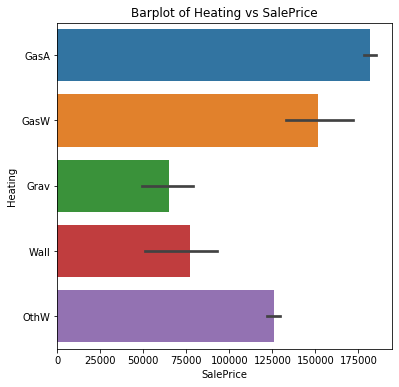

In [120]:
plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_title(label='Barplot of Heating vs SalePrice')
sns.barplot(y = 'Heating', x = 'SalePrice', data = train)

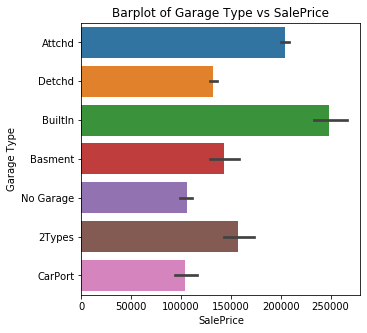

In [121]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Garage Type vs SalePrice')
sns.barplot(y = 'Garage Type', x = 'SalePrice', data = train)

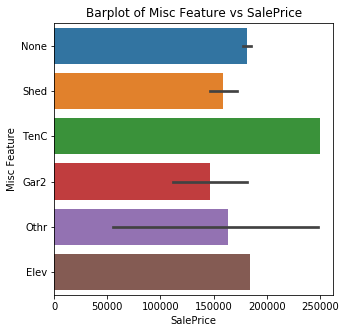

In [122]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Misc Feature vs SalePrice')
sns.barplot(y = 'Misc Feature', x = 'SalePrice', data = train)

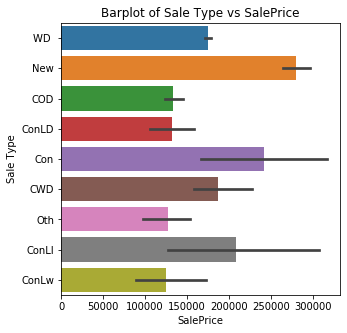

In [123]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Sale Type vs SalePrice')
sns.barplot(y = 'Sale Type', x = 'SalePrice', data = train)

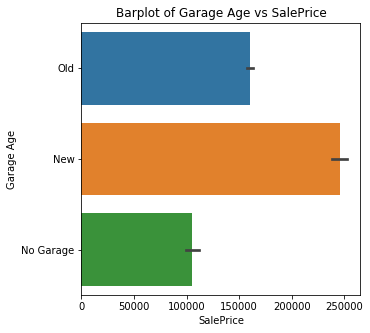

In [124]:
plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_title(label='Barplot of Garage Age vs SalePrice')
sns.barplot(y = 'Garage Age', x = 'SalePrice', data = train)

We will pick from the other features for dummies except 'Condition 2' to see how the baseline model is. 

In [125]:
# dropping 'Condition 2'
train = train.drop(columns='Condition 2')

In [126]:
# list of picked features, picked these features according to how well the model's r2 scores accros lr, lasso, ridge and enet
features_picked_cat = ['Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type', 'Foundation', 'Heating', 'Garage Type']

In [127]:
# creating dummies for nominal features
train_dummies = pd.get_dummies(train[features_picked_cat], drop_first= True)

In [128]:
# verifying the dummies
train_dummies.head(10)

,Street_Pave,Alley_No Alley,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage
0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [129]:
# list of categorical features 
features_dummies = list(train_dummies.columns)


## Feature Selection: Numerical (Train)

In [130]:
# separating the numerical columns 
train_ord = train.drop(columns=train.dtypes[train.dtypes == 'object'].keys())

In [131]:
# verifying the separation 
train_ord.head()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice
0,68.960047,13517,2,3,2,6,8,1976,2005,289.0,3,2,3,3,1,6,533.0,1,0.0,192.0,725.0,4,1,4,754,0,0.0,0.0,2,1,3,1,3,6,7,0,0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,3,2010,130500
1,43.000000,11492,2,3,2,7,5,1996,1997,132.0,3,2,4,3,1,6,637.0,1,0.0,276.0,913.0,4,1,4,1209,0,1.0,0.0,2,1,4,1,3,8,7,1,3,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,4,2009,220000
2,68.000000,7922,3,3,2,5,7,1953,2007,0.0,2,3,3,3,1,6,731.0,1,0.0,326.0,1057.0,2,1,4,0,0,1.0,0.0,1,0,3,1,3,5,7,0,0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,1,2010,109000
3,73.000000,9802,3,3,2,5,5,2006,2007,0.0,2,2,4,3,1,1,0.0,1,0.0,384.0,384.0,3,1,4,700,0,0.0,0.0,2,1,3,1,2,7,7,0,0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,4,2010,174000
4,82.000000,14235,2,3,2,6,8,1900,1993,0.0,2,2,2,4,1,1,0.0,1,0.0,676.0,676.0,2,1,4,614,0,0.0,0.0,2,0,3,1,2,6,7,0,0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,3,2010,138500


In [132]:
# selecting correlation coefficients against 'SalePrice' which are about less than -0.4 and more than 0.4
train_ord.corr()[(train_ord.corr()['SalePrice'] <= -0.4) | (train_ord.corr()['SalePrice'] >= 0.4)]['SalePrice'].sort_values(ascending = True)

BsmtFin SF 1      0.424380
Bsmt Exposure     0.426241
Heating QC        0.458396
Fireplaces        0.471222
TotRms AbvGrd     0.505188
Mas Vnr Area      0.512699
Fireplace Qu      0.537287
Full Bath         0.538471
Year Remod/Add    0.549397
Garage Finish     0.558269
Year Built        0.571860
Bsmt Qual         0.615154
Total Bsmt SF     0.631975
Garage Cars       0.647015
Garage Area       0.648661
Kitchen Qual      0.691030
Exter Qual        0.711814
Overall Qual      0.799978
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [133]:
# list of numerical features with high correlation
features_ord = train_ord.corr()[(train_ord.corr()['SalePrice'] <= -0.4) | (train_ord.corr()['SalePrice'] >= 0.4)]['SalePrice'].sort_values(ascending = True).keys()
features_ord

Index(['BsmtFin SF 1', 'Bsmt Exposure', 'Heating QC', 'Fireplaces',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplace Qu', 'Full Bath',
       'Year Remod/Add', 'Garage Finish', 'Year Built', 'Bsmt Qual',
       'Total Bsmt SF', 'Garage Cars', 'Garage Area', 'Kitchen Qual',
       'Exter Qual', 'Overall Qual', 'SalePrice'],
      dtype='object')

## Model Prep: Create our features matrix (`X`) and target vector (`y`)

In [134]:
# features that I have picked 
train_features = train[features_ord].merge(train_dummies[features_dummies], left_index = True, right_index = True )

In [135]:
len(list(train_features.columns))

75

In [136]:
X = train_features[list(train_features.drop(columns= 'SalePrice').columns)]
#X = train_features[list(train[features_ord].drop(columns= 'SalePrice').columns)]
y = train_features['SalePrice']

In [137]:
X.shape

(2026, 74)

In [138]:
y.shape

(2026,)

## Model Prep: Scaling

In [139]:
# scaling our features
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [140]:
X_scaled

array([[ 0.19751228, -0.58545438,  0.87995991, ..., -0.07388543,
        -0.59825483, -0.24190121],
       [ 0.4232663 , -0.58545438,  0.87995991, ..., -0.07388543,
        -0.59825483, -0.24190121],
       [ 0.62731322, -0.58545438, -1.19306193, ..., -0.07388543,
         1.67152849, -0.24190121],
       ...,
       [-0.95947712, -0.58545438, -0.15655101, ..., -0.07388543,
         1.67152849, -0.24190121],
       [-0.62301679, -0.58545438, -1.19306193, ..., -0.07388543,
        -0.59825483, -0.24190121],
       [-0.95947712, -0.58545438, -0.15655101, ..., -0.07388543,
        -0.59825483, -0.24190121]])

## Linear Regression Model

In [141]:
lr = LinearRegression()

In [142]:
lr.fit(X_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
# baseline model
cross_val_score(lr, X_scaled, y, cv = 5).mean()

0.8506533474486411

## Recursive Feature Elimination

In [144]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 25)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_scaled,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False  True  True False False  True
  True  True  True  True  True  True False False False  True False False
 False False False False False False False False False  True False False
 False  True False False False False False False False  True  True False
 False False False  True  True False False False  True  True  True False
 False  True False False False False False False False False False False
 False False]
[ 1  1 11  1  1  1 13  1  1 15 17  1  1  1  1  1  1  1 50 37 36  1  9 10
  6 48 25 28 43 24 44 14 31  1 16 23 40  1 19 39 21 46 34 22 33  1  1 18
 45 32 35  1  1 42 12 20  1  1  1  7  8  1 49 38 41 27 26 47  3 29  4 30
  5  2]


In [145]:
# top features after RFE
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 25)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_scaled,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['BsmtFin SF 1', 'Bsmt Exposure', 'Fireplaces', 'TotRms AbvGrd',
       'Mas Vnr Area', 'Full Bath', 'Year Remod/Add', 'Bsmt Qual',
       'Total Bsmt SF', 'Garage Cars', 'Garage Area', 'Kitchen Qual',
       'Exter Qual', 'Overall Qual', 'Land Contour_HLS',
       'Neighborhood_Crawfor', 'Neighborhood_GrnHill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE',
       'Foundation_Slab'],
      dtype='object')


In [146]:
X_new = train_features[selected_features_rfe]

## Ridge Regression

In [147]:
ridge = RidgeCV(alphas=np.linspace(0.1, 10, 100))

In [148]:
ridge_scores = cross_val_score(ridge,X_new,y,scoring='r2',cv=5)
ridge_scores.mean()

0.8473904722173533

## Lasso Regression

In [149]:
lasso = LassoCV(alphas=np.arange(0.01, 0.5, 0.02))

In [150]:
lasso_scores = cross_val_score(lasso,X_new,y,cv=5)
lasso_scores.mean()

/Users/russ1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/russ1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/russ1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/russ1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence t

0.8482206080516692

## Lasso Coefficients

In [151]:
lasso.fit(X_new, y)

/Users/russ1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49]),
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [152]:
lasso_coefs = pd.DataFrame({'variable':X_new.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,variable,coef,abs_coef
16,Neighborhood_GrnHill,142934.557117,142934.557117
20,Neighborhood_StoneBr,66692.639051,66692.639051
17,Neighborhood_NoRidge,47579.938629,47579.938629
18,Neighborhood_NridgHt,44283.950505,44283.950505
23,Bldg Type_TwnhsE,-29308.697747,29308.697747
24,Foundation_Slab,28165.215360,28165.215360
22,Bldg Type_Twnhs,-27955.080125,27955.080125
15,Neighborhood_Crawfor,22130.130776,22130.130776
21,Bldg Type_Duplex,-17351.931469,17351.931469
19,Neighborhood_Somerst,14930.808659,14930.808659


Lasso regression did not drop any coefficient after recursive elimination. 

## Elastic Net Regression

In [153]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=5,
                            verbose=1)
optimal_enet.fit(X_new, y)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

22438.04382061628
1.0


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.6s finished


In [154]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_new, y, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.65797568 0.69051855 0.7210069  0.77095091 0.42309177 0.70022671
 0.68623313 0.71912531 0.70383933 0.53427111]
0.6607239398714444


## Preparing the test data set (Cleaning and Aligning)

In [155]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [156]:
test.isnull().sum()[test.isnull().sum() != 0].sort_values(ascending = True)

Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Garage Type        44
Garage Cond        45
Garage Qual        45
Garage Finish      45
Garage Yr Blt      45
Lot Frontage      160
Fireplace Qu      422
Fence             707
Alley             821
Misc Feature      838
Pool QC           875
dtype: int64

In [157]:
test[list(train[features_ord].drop(columns= 'SalePrice').columns)].dtypes

BsmtFin SF 1        int64
Bsmt Exposure      object
Heating QC         object
Fireplaces          int64
TotRms AbvGrd       int64
Mas Vnr Area      float64
Fireplace Qu       object
Full Bath           int64
Year Remod/Add      int64
Garage Finish      object
Year Built          int64
Bsmt Qual          object
Total Bsmt SF       int64
Garage Cars         int64
Garage Area         int64
Kitchen Qual       object
Exter Qual         object
Overall Qual        int64
dtype: object

In [158]:
# the NaN values in 'Bsmt Exposure' actually indicate the absence of a basement, we will fill NaN with 'No Basement'
test['Bsmt Exposure'] = test['Bsmt Exposure'].fillna('No Basement')

In [159]:
# verifying the fill
test['Bsmt Exposure'].value_counts()

No             567
Av             130
Gd              81
Mn              76
No Basement     25
Name: Bsmt Exposure, dtype: int64

In [160]:
# since 'Bsmt Exposure' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(No Basement) and 4 being the best (Gd)
test['Bsmt Exposure'] = test['Bsmt Exposure'].map({'No Basement' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4})

In [161]:
# verifying the change
test['Bsmt Exposure'].value_counts()

1    567
3    130
4     81
2     76
0     25
Name: Bsmt Exposure, dtype: int64

In [162]:
# since 'Heating QC' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(Po) and 4 being the best (Ex)
test['Heating QC'] = test['Heating QC'].map({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

In [163]:
# verifying the change
test['Heating QC'].value_counts()

4    430
2    267
3    157
1     25
Name: Heating QC, dtype: int64

In [164]:
# the NaN values in 'Fireplace Qu' indicate that the house has no fireplace, we will fill NaN with 'No Fireplace'
test['Fireplace Qu'] = test['Fireplace Qu'].fillna('No Fireplace')

In [165]:
# verifying the fill
test['Fireplace Qu'].value_counts()

No Fireplace    422
Gd              221
TA              193
Fa               16
Po               15
Ex               12
Name: Fireplace Qu, dtype: int64

In [166]:
# since 'Fireplace Qu' is an ordinal feature, we will map each grade from with a value from 0 to 5.
# 0 being the worst(No Fireplace) and 5 being the best (Ex)
test['Fireplace Qu'] = test['Fireplace Qu'].map({'No Fireplace' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 })

In [167]:
# verifying the change
test['Fireplace Qu'].value_counts()

0    422
4    221
3    193
2     16
1     15
5     12
Name: Fireplace Qu, dtype: int64

In [168]:
# the NaN values in 'Garage Finish' indicate that the house has no garage, we will fill NaN with 'No Garage'
test['Garage Finish'] = test['Garage Finish'].fillna('No Garage')

In [169]:
# verifying the fill
test['Garage Finish'].value_counts()

Unf          382
RFn          233
Fin          219
No Garage     45
Name: Garage Finish, dtype: int64

In [170]:
# since 'Garage Finish' is an ordinal feature, we will map each grade from with a value from 0 to 3.
# 0 being the worst(No Garage) and 3 being the best (Fin)
test['Garage Finish'] = test['Garage Finish'].map({'No Garage' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3})

In [171]:
# verifying the change
test['Garage Finish'].value_counts()

1    382
2    233
3    219
0     45
Name: Garage Finish, dtype: int64

In [172]:
# the NaN values in 'Bsmt Qual' actually indicate the absence of a basement, we will fill NaN with 'No Basement'
test['Bsmt Qual'] = test['Bsmt Qual'].fillna('No Basement')

In [173]:
# verifying the fill
test['Bsmt Qual'].value_counts()

TA             396
Gd             355
Ex              74
Fa              28
No Basement     25
Po               1
Name: Bsmt Qual, dtype: int64

In [174]:
# since 'Bsmt Qual' is an ordinal feature, we will map each grade from with a value from 0 to 5.
# 0 being the worst(No Basement) and 5 being the best (Ex)
test['Bsmt Qual'] = test['Bsmt Qual'].map({'No Basement' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5 })

In [175]:
# verifying the change
test['Bsmt Qual'].value_counts()

3    396
4    355
5     74
2     28
0     25
1      1
Name: Bsmt Qual, dtype: int64

In [176]:
# since 'Kitchen Qual' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(Po) and 4 being the best (Ex)
test['Kitchen Qual'] = test['Kitchen Qual'].map({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

In [177]:
# verifying the change
test['Kitchen Qual'].value_counts()

2    447
3    354
4     54
1     23
0      1
Name: Kitchen Qual, dtype: int64

In [178]:
# since 'Exter Qual' is an ordinal feature, we will map each grade from with a value from 0 to 4.
# 0 being the worst(Po) and 4 being the best (Ex)
test['Exter Qual'] = test['Exter Qual'].map({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4})

In [179]:
# verifying the change
test['Exter Qual'].value_counts()

2    552
3    292
4     26
1      9
Name: Exter Qual, dtype: int64

In [180]:
# verifying the changes
test[list(train[features_ord].drop(columns= 'SalePrice').columns)].dtypes

BsmtFin SF 1        int64
Bsmt Exposure       int64
Heating QC          int64
Fireplaces          int64
TotRms AbvGrd       int64
Mas Vnr Area      float64
Fireplace Qu        int64
Full Bath           int64
Year Remod/Add      int64
Garage Finish       int64
Year Built          int64
Bsmt Qual           int64
Total Bsmt SF       int64
Garage Cars         int64
Garage Area         int64
Kitchen Qual        int64
Exter Qual          int64
Overall Qual        int64
dtype: object

In [181]:
features_ord

Index(['BsmtFin SF 1', 'Bsmt Exposure', 'Heating QC', 'Fireplaces',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplace Qu', 'Full Bath',
       'Year Remod/Add', 'Garage Finish', 'Year Built', 'Bsmt Qual',
       'Total Bsmt SF', 'Garage Cars', 'Garage Area', 'Kitchen Qual',
       'Exter Qual', 'Overall Qual', 'SalePrice'],
      dtype='object')

In [182]:
features_ord_no_saleprice = features_ord[0:18]
features_ord_no_saleprice

Index(['BsmtFin SF 1', 'Bsmt Exposure', 'Heating QC', 'Fireplaces',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplace Qu', 'Full Bath',
       'Year Remod/Add', 'Garage Finish', 'Year Built', 'Bsmt Qual',
       'Total Bsmt SF', 'Garage Cars', 'Garage Area', 'Kitchen Qual',
       'Exter Qual', 'Overall Qual'],
      dtype='object')

In [183]:
test_with_dummies = pd.get_dummies(test[features_picked_cat])

In [184]:
test_with_dummies.head()

,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd
0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [185]:
test_with_dummies = test[features_ord_no_saleprice].merge(test_with_dummies, right_index = True, left_index = True)

In [186]:
test_with_dummies.shape

(879, 78)

In [187]:
# aligning train and test sets after cleaning and feature selection
train_final, test_final = X_new.align(test_with_dummies, fill_value= 0)

In [188]:
# verifying the changes
test_final[selected_features_rfe].head()

,BsmtFin SF 1,Bsmt Exposure,Fireplaces,TotRms AbvGrd,Mas Vnr Area,Full Bath,Year Remod/Add,Bsmt Qual,Total Bsmt SF,Garage Cars,Garage Area,Kitchen Qual,Exter Qual,Overall Qual,Land Contour_HLS,Neighborhood_Crawfor,Neighborhood_GrnHill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Foundation_Slab
0,0,1,0,9,0.0,2,1950,2,1020,1,440,1,2,6,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,10,0.0,2,1977,4,1967,2,580,2,2,5,0,0,0,0,0,0,0,1,0,0,0
2,554,3,1,7,0.0,2,2006,4,654,2,426,3,3,7,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,5,0.0,1,2006,3,968,2,480,2,3,5,0,0,0,0,0,0,0,0,0,0,0
4,609,1,2,6,247.0,1,1963,4,1394,2,514,2,2,6,0,0,0,0,0,0,0,0,0,0,0


In [189]:
X_test = test_final[selected_features_rfe]

In [190]:
# checking for null
X_test.isnull().sum()

BsmtFin SF 1            0
Bsmt Exposure           0
Fireplaces              0
TotRms AbvGrd           0
Mas Vnr Area            1
Full Bath               0
Year Remod/Add          0
Bsmt Qual               0
Total Bsmt SF           0
Garage Cars             0
Garage Area             0
Kitchen Qual            0
Exter Qual              0
Overall Qual            0
Land Contour_HLS        0
Neighborhood_Crawfor    0
Neighborhood_GrnHill    0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Bldg Type_Duplex        0
Bldg Type_Twnhs         0
Bldg Type_TwnhsE        0
Foundation_Slab         0
dtype: int64

In [191]:
# filling Mass Vnr Area with 0 as NaN indicates no Masonry veneer area
X_test = X_test.fillna(0)

## Model Fitting and Evaluation
-----------------------------------------
Since Lasso Regression is the best model, we will test the testing data with it. 

In [192]:
lasso.fit(X_new, y)

/Users/russ1337/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49]),
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [193]:
lasso.score(X_new, y)

0.8549636420664583

In [194]:
lasso.coef_

array([ 1.68082943e+01,  5.74774035e+03,  1.18444814e+04,  6.41103382e+03,
        2.61973643e+01,  1.01661675e+04,  1.77366984e+02,  5.57882431e+03,
        1.19553946e+01,  4.49637037e+03,  2.49389972e+01,  1.21829983e+04,
        1.15133755e+04,  1.11222137e+04,  1.38583271e+04,  2.21301308e+04,
        1.42934557e+05,  4.75799386e+04,  4.42839505e+04,  1.49308087e+04,
        6.66926391e+04, -1.73519315e+04, -2.79550801e+04, -2.93086977e+04,
        2.81652154e+04])

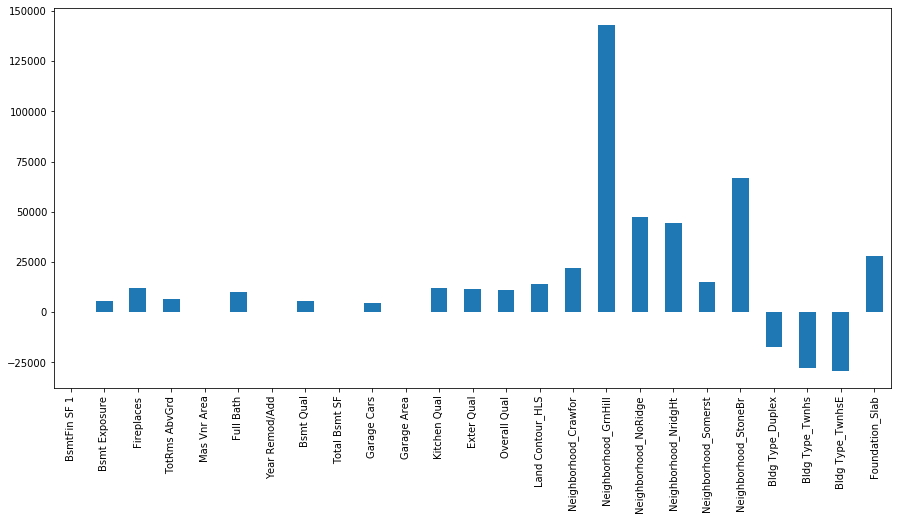

In [195]:
pd.Series((lasso.coef_), index=list(X_new.columns)).plot.bar(figsize=(15, 7))

Which features appear to add the most value to a home? Which features hurt the value of a home the most?


The feature which influences prices most is dependant on whether the house is located in the Neighborhood of Green Hills while the feature which hurts house prices most is if the house is if the house is a Townhouse end unit. 

What are things that homeowners could improve in their homes to increase the value?


Some features home owners should look at to improve their house prices are the number of full bathrooms above grade, Kitchen quality, Exterior quality, Overall quality, having Hill side land contour and having slab foundation. 

What neighborhoods seem like they might be a good investment?


Neighborhoods which may be considered good investments are (in order) Green Hills, Stone Brook, Northridge, Northridge Heights, Crawford and Somerset.

Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?

No, the stronger features in this model are largely dependent on the neighborhood the houses are in. We can look that factors which make those neighborhoods more desirable compared to the others. For exmaple, we can look at the crime rates in the neighborhood or distance away from the central business district or the quality of air in the neighborhood. 

## Kaggle Submission

In [196]:
pred_lasso = lasso.predict(X_test)

In [197]:
pred_lasso_sub = pd.DataFrame(pred_lasso).rename(columns = {0 : 'SalePrice'})

In [198]:
pred_lasso_sub.head()

,SalePrice
0,133932.304620
1,159308.337392
2,221625.329567
3,131079.787120
4,181388.590065


In [199]:
# merging saleprice with id and setting id as index
pred_lasso_sub_final = test[['Id']].merge(pred_lasso_sub, left_index = True, right_index = True).set_index('Id')

In [200]:
# verifying the index
pred_lasso_sub_final.head()

,SalePrice
Id,
2658,133932.304620
2718,159308.337392
2414,221625.329567
1989,131079.787120
625,181388.590065


In [201]:
# 25 features via RFE gave the best score among my submissions
pred_lasso_sub_final.to_csv('pred_lasso_sub3_final.csv') 